In [1]:
# Import the simple_linear_clean dataset and describe the data.

import pandas as pd

# Read the file
pd_simple_linear_clean = pd.read_csv(r"C:\Users\ACER\Desktop\Kranthi\DataScience_Desktop\MachineLearningFiles\simple_linear_clean.csv")

# Describe the data
pd_simple_linear_clean.describe()

,Feature,Target
count,500.000000,500.000000
mean,49.856171,174.572798
std,29.868841,105.706503
min,0.506158,-11.514831
25%,24.127969,84.250865
50%,51.316375,179.316134
75%,75.612488,267.110379
max,99.296480,363.640834


In [3]:
# See the first 3 records

pd_simple_linear_clean.head(3)

,Feature,Target
0,37.454012,134.506601
1,95.071431,351.511716
2,73.199394,265.702118


In [5]:
# See the sample records(Random records)

pd_simple_linear_clean.sample(3)

,Feature,Target
25,78.517596,263.565166
147,50.267902,163.827496
54,59.789998,213.105647


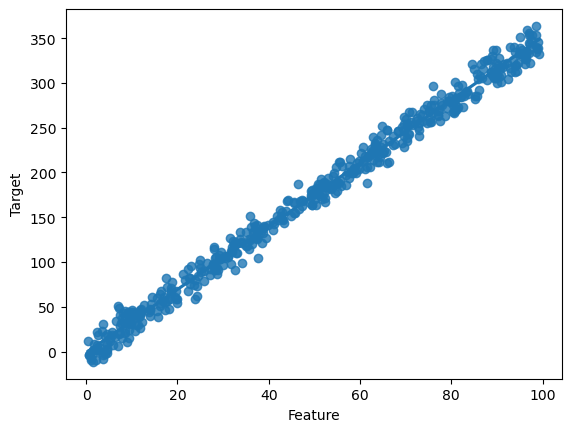

In [13]:
#### Draw Linear Regression Line using Reg Plot

import seaborn as sns
import matplotlib.pyplot as plt

# Create a regression plot
# 'x' and 'y' specify the columns to be plotted
sns.regplot(x='Feature', y='Target',data = pd_simple_linear_clean)

# Display the plot
plt.show()

In [4]:
# Split the data using train test split method for next steps

from sklearn.model_selection import train_test_split

x_train_feature,x_test_feature,y_train_target,y_test_target = train_test_split(pd_simple_linear_clean[['Feature']], 
                                                                               pd_simple_linear_clean[['Target']],test_size=0.2,random_state=42)

In [5]:
# Verify the size of the each dataset

print(x_train_feature.shape)
print(x_test_feature.shape)
print(y_train_target.shape)
print(y_test_target.shape)

(400, 1)
(100, 1)
(400, 1)
(100, 1)


In [6]:
# Create an object of Linear Regression and train the model with the data.
# LinearRegression is a class

from sklearn.linear_model import LinearRegression


# Create an instance of LinearRegression class
my_model = LinearRegression()

# Train the model with the training data
my_model.fit(x_train_feature,y_train_target)

LinearRegression()

In [7]:
# y = mx +c
# slope m, value

my_model.coef_

array([[3.52327729]])

In [8]:
# y = mx + c 
# intercept c, Value

my_model.intercept_

array([-1.22753705])

In [9]:
# Predict the Target with the model

y_predict_target = my_model.predict(x_test_feature)

In [10]:
y_test_target.head(3)

,Target
361,217.597047
73,273.432721
374,19.159649


In [11]:
# Reset the index so that we can join the y test data(Actual target) with the y predict target(Model predicted outcome)
# y test target data

y_test_target.reset_index(drop=True,inplace=True)
y_test_target

,Target
0,217.597047
1,273.432721
2,19.159649
3,73.422276
4,317.568539
...,...
95,-1.169433
96,240.210252
97,255.505144
98,242.729754


In [12]:
# Convert the model predicted output in array format to dataframe

y_predict_target = pd.DataFrame(y_predict_target)
y_predict_target

,0
0,225.420740
1,286.082136
2,23.854198
3,84.055247
4,318.533298
...,...
95,14.734322
96,255.832951
97,255.621903
98,247.601183


In [13]:
# Join the test Target with the predicted Target to compare the results

merge_test_predict_target = pd.merge(y_test_target,y_predict_target,how='inner',left_index=True,right_index=True)
merge_test_predict_target.head(3)

,Target,0
0,217.597047,225.420740
1,273.432721,286.082136
2,19.159649,23.854198


In [17]:
# Rename the columns of merge_test_predict_target dataset for better understanding

merge_test_predict_target.rename(columns={'Target': 'Test_Target'}, inplace=True)
merge_test_predict_target.rename(columns={0: 'Predicted_Target'}, inplace=True)

merge_test_predict_target.head(3)

,Test_Target,Predicted_Target
0,217.597047,225.420740
1,273.432721,286.082136
2,19.159649,23.854198


In [18]:
# Test the prediction by using Mean Absolute Error method - |predicted value - actual value|N
# Manually

MAE_Manual = sum(abs(merge_test_predict_target.Test_Target-merge_test_predict_target.Predicted_Target))/len(merge_test_predict_target)
MAE_Manual

8.148649923049147

In [19]:
# Evaluate the model using metrics such as Mean Squared Error (MSE)
# By using the formula, calculate the MAE, MSQE, RMSQE

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

MAE_Formula = mean_absolute_error(merge_test_predict_target.Test_Target,merge_test_predict_target.Predicted_Target)
print("MAE ", MAE_Formula)

mse_value = mean_squared_error(merge_test_predict_target.Test_Target,merge_test_predict_target.Predicted_Target)
print("mse_value ",mse_value)

RMSE = root_mean_squared_error(merge_test_predict_target.Test_Target,merge_test_predict_target.Predicted_Target)
print("RMSE ",RMSE)

R2Score = r2_score(merge_test_predict_target.Test_Target,merge_test_predict_target.Predicted_Target)
print("R2Score ",R2Score)

MAE  8.148649923049147
mse_value  104.42171175195172
RMSE  10.218694229301105


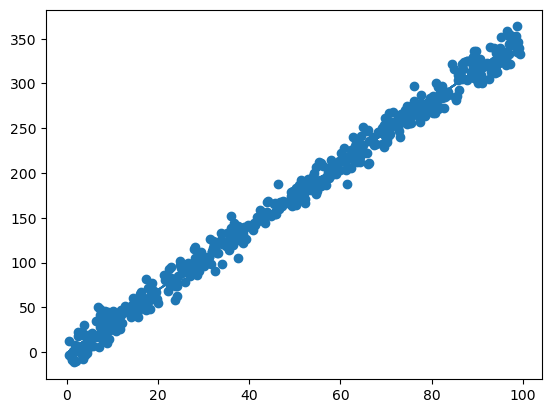

In [20]:
# Visualize the data points using scatter plot and regression line
# Calculate the slope, intercept, standard error and also best linear line for the below input values.
# Slope(y), Intercept(c) is calculated by using the linregress function.
# Using slope and intercept draw the best linear line. y = mx+c

import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(pd_simple_linear_clean.Feature, pd_simple_linear_clean.Target)

# Calculate the y = mx + c for each value of x
def myfunc(x):
  return slope * x + intercept

# Send each value of pd_simple_linear_clean.Feature and calculate the value of Predict Target and store in a list.
mymodel = list(map(myfunc, pd_simple_linear_clean.Feature))
#print(mymodel.sort)

# Now draw the scatter plot with the input values
plt.scatter(pd_simple_linear_clean.Feature, pd_simple_linear_clean.Target)

# Draw the line plot using the input of x and derived y values.
plt.plot(pd_simple_linear_clean.Feature, mymodel)
plt.show()

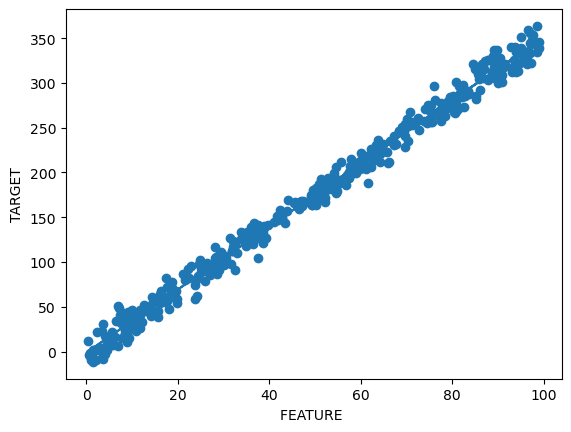

In [21]:
# Create a 
# scatterplot with the input/output values and 
# linear regression line created test input/predicted values

# x_train_feature,x_test_feature,y_train_target,y_test_target

import matplotlib.pyplot as plt

plt.xlabel('FEATURE ')
plt.ylabel('TARGET')
plt.scatter(x_train_feature,y_train_target)
plt.plot(x_train_feature,my_model.predict(x_train_feature))
#plt.plot(x_test_cgpa,my_model.predict(x_test_cgpa))

<Axes: xlabel='Feature', ylabel='Target'>

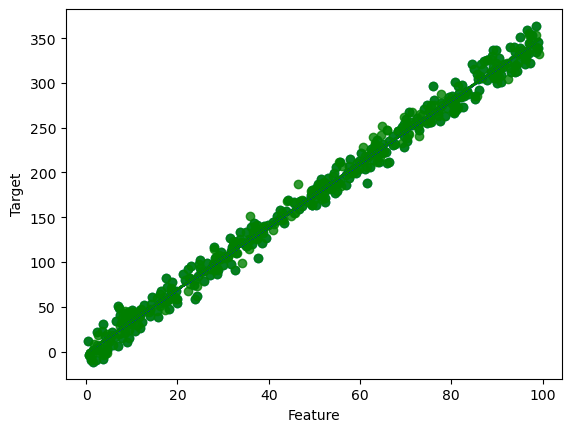

In [62]:
# Create a 
# scatterplot with the input/output values and 
# linear regression line created test input/predicted values

# x_train_feature,x_test_feature,y_train_target,y_test_target

import matplotlib.pyplot as plt
import seaborn as sns

plt.xlabel('FEATURE ')
plt.ylabel('TARGET')
plt.scatter(x_train_feature,y_train_target)
#plt.plot(x_train_feature,my_model.predict(x_train_feature))
plt.plot(x_test_feature,my_model.predict(x_test_feature),color='b')
sns.regplot(x='Feature', y='Target',data = pd_simple_linear_clean,color='g')    